In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('ex_0921data.csv',header=None)
data

,0,1
0,-0.99707,0.187890
1,-0.98005,0.063013
2,-0.92997,0.143280
3,-0.92648,0.137950
4,-0.92050,0.617300
...,...,...
195,0.96199,0.488450
196,0.97220,0.646670
197,0.97714,0.683340
198,0.98669,0.805490


In [3]:
data = data.sample(frac=1.0)  # random divide
data1 = data.iloc[0:round(data.shape[0]/3)-1,:]
data2 = data.iloc[round(data.shape[0]/3)-1:(2*round(data.shape[0]/3)-2),:]
data3 = data.iloc[(2*round(data.shape[0]/3)-2):data.shape[0],:]

In [4]:
list1 = [data3, data1, data2]

list2 = [[data1, data2], [data2, data3], [data3, data1]]

def polynomial(order):
    I =[0, 0, 0]
    
    for i in range(3):
        frames = pd.concat(list2[i], axis = 0)
        f = np.polyfit(frames.iloc[:,0], frames.iloc[:,1], order)
        p = np.poly1d(f)
        yvals = p(list1[i].iloc[:,0])
        I[i] = np.sum(np.square(list1[i].iloc[:,1]-yvals))/list1[i].shape[0]
    
    return sum(I)/3

In [5]:
I = []
for i in range(1,11):
    I.append(polynomial(i))
I

[0.11333779189067489,
 0.11408884272341492,
 0.08833102346131814,
 0.08711727113255269,
 0.08027773175742796,
 0.081805600304056,
 0.07525173013329572,
 0.07423774921191005,
 0.07274679659254092,
 0.07348577611387909]

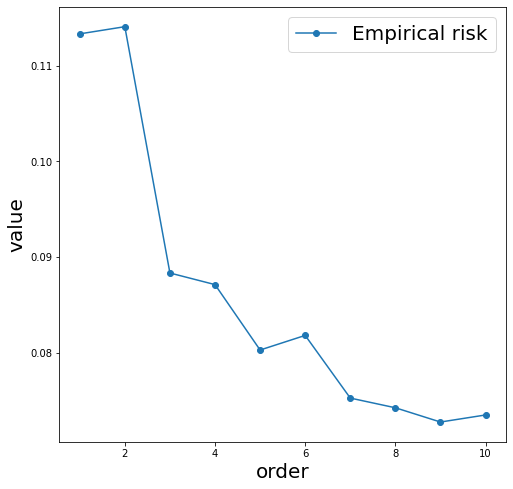

In [6]:
fig, ax = plt.subplots(figsize=(8,8))
ax.plot(range(1,11),I, 'o-')
ax.set_xlabel('order', fontsize=20)
ax.set_ylabel('value', fontsize=20)
ax.legend(['Empirical risk'], fontsize=20)

## The order of polynomial where the minimum empirical risk appears:

In [7]:
I.index(min(I))+1

9

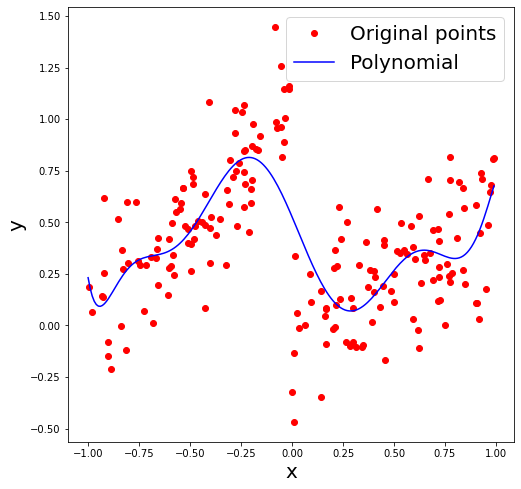

In [8]:
f = np.polyfit(data.iloc[:,0], data.iloc[:,1], I.index(min(I))+1)
p = np.poly1d(f)
x =  np.arange(-1,1,0.01)
y = p(x)
fig, ax = plt.subplots(figsize=(8,8))
ax.plot(data.iloc[:,0], data.iloc[:,1], 'ro')
ax.plot(x, y, 'b-')
ax.set_xlabel('x', fontsize=20)
ax.set_ylabel('y', fontsize=20)
ax.legend(['Original points','Polynomial'], fontsize=20)